Aplicación de Navier-Stokes
----
***

Aquí están nuestras ecuaciones de Navier-Stokes modificadas:

\begin{eqnarray}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}&=&-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F\\\
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}&=&-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)
\end{eqnarray}


$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

### Ecuaciones discretizadas

La ecuación de momento-$u$:

\begin{eqnarray}
&&\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}\\\
&&+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{eqnarray}

La ecuación de momento-$v$:

\begin{eqnarray}
&&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}\\\
&&+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{eqnarray}

Y la ecuación de presión

\begin{eqnarray}
&&\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}\\\
&&=\rho\left(\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.\\\
&&-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\\\
&&-2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}\\\
&&-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)
\end{eqnarray}

Como siempre, tenemos que volver a organizar estas ecuaciones a la forma que necesitamos en el código para que las iteraciones avancen:

Para los componentes $u$- y $v$ de la ecuación de momento, despejamos la velocidad en el instante `n+1`:

$$u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})-v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})
-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})$$
$$+\nu\left[\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right] + F\Delta t$$

$$
v_{i,j}^{n+1}=v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})-v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})$$
$$+\nu\left[\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right]$$

Y para la ecuación de la presión, despejamos $p_{i,j}^n$ para iterar en el pseudo-tiempo:

$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}\times
$$
$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)- \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} \right.$$
$$- 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

La condición inicial es $u, v, p=0$ en todos los puntos, y en la frontera la condición es:

$u, v, p$ son periódicas en $x=0,2$

$u, v =0$ en $y =0,2$

$\frac{\partial p}{\partial y}=0$ at $y =0,2$

$F=1$ en el resto.

Vamos a comenzar importando nuestras librerías:

In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Una cosa a destacar es que tenemos condiciones de contorno periódicas en toda esta malla, por lo que necesitamos para calcular de forma explícita los valores en el borde de entrada y salida de nuestra `vector` u.

In [2]:
def buildUpB(rho, dt, dx, dy, u, v):
    b = np.zeros_like(u)
    
    b[1:-1,1:-1]=rho*(1/dt*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx)+(v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))-\
		((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx))**2-\
		2*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dy)*(v[2:,1:-1]-v[0:-2,1:-1])/(2*dx))-\
		((v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))**2)	
	
	#### Condición de contorno periódica de presión @ x = 2
    b[-1,1:-1]=rho*(1/dt*((u[0,1:-1]-u[-2,1:-1])/(2*dx)+(v[-1,2:]-v[-1,0:-2])/(2*dy))-\
		((u[0,1:-1]-u[-2,1:-1])/(2*dx))**2-\
		2*((u[-1,2:]-u[-1,0:-2])/(2*dy)*(v[0,1:-1]-v[-2,1:-1])/(2*dx))-\
		((v[-1,2:]-v[-1,0:-2])/(2*dy))**2)	

	#### Condición de contorno periódica de presión @ x = 0
    b[0,1:-1]=rho*(1/dt*((u[1,1:-1]-u[-1,1:-1])/(2*dx)+(v[0,2:]-v[0,0:-2])/(2*dy))-\
		((u[1,1:-1]-u[-1,1:-1])/(2*dx))**2-\
		2*((u[0,2:]-u[0,0:-2])/(2*dy)*(v[1,1:-1]-v[-1,1:-1])/(2*dx))-\
		((v[0,2:]-v[0,0:-2])/(2*dy))**2)
    
    return b

También vamos a definir una función de presión-Poisson iterativa. Una vez más, ten en cuenta que hay que incluir las condiciones de contorno periódicas en el borde de entrada y salida. También tenemos que especificar las condiciones de contorno en la parte superior e inferior de nuestra malla.

In [17]:
def presPoissPeriodic(p, dx, dy):
    pn = np.empty_like(p)
    
    for q in range(nit):
        pn[:]=p[:]
        p[1:-1,1:-1] = ((pn[2:,1:-1]+pn[0:-2,1:-1])*dy**2+(pn[1:-1,2:]+pn[1:-1,0:-2])*dx**2)/\
            (2*(dx**2+dy**2)) - dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]
        
        #### Condición de contorno periódica de presión @ x = 2
        p[-1,1:-1] = ((pn[0,1:-1]+pn[-2,1:-1])*dy**2+(pn[-1,2:]+pn[-1,0:-2])*dx**2)/\
            (2*(dx**2+dy**2)) - dx**2*dy**2/(2*(dx**2+dy**2))*b[-1,1:-1]
        
        #### Condición de contorno periódica de presión @ x = 0
        p[0,1:-1] = ((pn[1,1:-1]+pn[-1,1:-1])*dy**2+(pn[0,2:]+pn[0,0:-2])*dx**2)/\
			(2*(dx**2+dy**2)) -\
			dx**2*dy**2/(2*(dx**2+dy**2))*b[0,1:-1]
		
		#### Condicion de contorno en la pared, presión
        # dp/dy = 0 at y = 2
        p[-1,:] = p[-2,:]
        # dp/dy = 0 at y = 0
        p[0,:] = p[1,:]
    
    return p

Ahora que tenemos nuestra lista familiar de variables y condiciones iniciales para crearlas antes de empezar.

In [18]:
## Creación de variables
nx = 41
ny = 41
nt = 10
nit=50 
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)
Y,X = np.meshgrid(y,x)


## Variables físicas
rho = 1
nu = .1
F = 1
dt = .01

# Condiciones inciales
u = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0
un = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0

v = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0
vn = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0

p = np.ones((ny,nx)) ## Crea un vecotr XxY de unos
pn = np.ones((ny,nx)) ## Crea un vecotr XxY de unos

b = np.zeros((ny,nx))

Estamos interesados en lo que se verá en nuestra figura una vez que hemos llegado a un estado casi estacionario. Tenemos la posibilidad de especificar un número de pasos en el tiempo `nt` e incrementarlo hasta que estemos satisfechos con los resultados, o bien, podemos decirle a nuestro código que se ejecute hasta que la diferencia entre dos iteraciones consecutivas sea muy pequeña.

También tenemos que manejar ** 8 ** condiciones de contorno separadas para cada iteración. El siguiente código escribe cada uno de ellos de forma explícita. Si estás interesado en un desafío, se puede tratar de escribir una función que puede manejar todas o algunas de estas condiciones de contorno. Si quieres intentarlo, probablemente deberías leer el uso de diccionarios en Python [(dictionaries)](http://docs.python.org/2/tutorial/datastructures.html#dictionaries). 

In [19]:
udiff = 1
stepcount = 0

while udiff > .001:
    un[:] = u[:]
    vn[:] = v[:]
	
    b = buildUpB(rho, dt, dx, dy, u, v)
    p = presPoissPeriodic(p, dx, dy)
		
    u[1:-1,1:-1] = un[1:-1,1:-1]-\
		un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
		vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
		dt/(2*rho*dx)*(p[2:,1:-1]-p[0:-2,1:-1])+\
		nu*(dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+\
		dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]))+F*dt
	
    v[1:-1,1:-1] = vn[1:-1,1:-1]-\
		un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
		vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
		dt/(2*rho*dy)*(p[1:-1,2:]-p[1:-1,0:-2])+\
		nu*(dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])+\
		(dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])))
	
	#### Condición periódica de contorno u @ x = 2
    u[-1,1:-1] = un[-1,1:-1]-\
		un[-1,1:-1]*dt/dx*(un[-1,1:-1]-un[-2,1:-1])-\
		vn[-1,1:-1]*dt/dy*(un[-1,1:-1]-un[-1,0:-2])-\
		dt/(2*rho*dx)*(p[0,1:-1]-p[-2,1:-1])+\
		nu*(dt/dx**2*(un[0,1:-1]-2*un[-1,1:-1]+un[-2,1:-1])+\
		dt/dy**2*(un[-1,2:]-2*un[-1,1:-1]+un[-1,0:-2]))+F*dt

	#### Condición periódica de contorno u @ x = 0
    u[0,1:-1] = un[0,1:-1]-\
		un[0,1:-1]*dt/dx*(un[0,1:-1]-un[-1,1:-1])-\
		vn[0,1:-1]*dt/dy*(un[0,1:-1]-un[0,0:-2])-\
		dt/(2*rho*dx)*(p[1,1:-1]-p[-1,1:-1])+\
		nu*(dt/dx**2*(un[1,1:-1]-2*un[0,1:-1]+un[-1,1:-1])+\
		dt/dy**2*(un[0,2:]-2*un[0,1:-1]+un[0,0:-2]))+F*dt

	#### Condición periódica de contorno v @ x = 2
    v[-1,1:-1] = vn[-1,1:-1]-\
		un[-1,1:-1]*dt/dx*(vn[-1,1:-1]-vn[-2,1:-1])-\
		vn[-1,1:-1]*dt/dy*(vn[-1,1:-1]-vn[-1,0:-2])-\
		dt/(2*rho*dy)*(p[-1,2:]-p[-1,0:-2])+\
		nu*(dt/dx**2*(vn[0,1:-1]-2*vn[-1,1:-1]+vn[-2,1:-1])+\
		(dt/dy**2*(vn[-1,2:]-2*vn[-1,1:-1]+vn[-1,0:-2])))

	#### Condición periódica de contorno v @ x = 0
    v[0,1:-1] = vn[0,1:-1]-\
		un[0,1:-1]*dt/dx*(vn[0,1:-1]-vn[-1,1:-1])-\
		vn[0,1:-1]*dt/dy*(vn[0,1:-1]-vn[0,0:-2])-\
		dt/(2*rho*dy)*(p[0,2:]-p[0,0:-2])+\
		nu*(dt/dx**2*(vn[1,1:-1]-2*vn[0,1:-1]+vn[-1,1:-1])+\
		(dt/dy**2*(vn[0,2:]-2*vn[0,1:-1]+vn[0,0:-2])))

	#### Pared C.C: u,v = 0 @ y = 0,2
    u[:,0] = 0
    u[:,-1] = 0
    v[:,0] = 0
    v[:,-1]=0
	
    udiff = (np.sum(u)-np.sum(un))/np.sum(u)
    stepcount += 1

Puedes ver que también hemos incluido una variable `stepcount` para ver cuantas iteraciones realizó nuestro bucle antes de que llegará a la condición de parada.

In [10]:
print stepcount

499


Si quieres ver cómo el número de iteraciones aumenta a medida que nuestra condición de `udiff` se hace más y más pequeña, trata de definir una función para realizar el bucle `while` escrito arriba para que tenga una entrada `udiff` y devuelva el número de iteraciones que la función ejecuta.

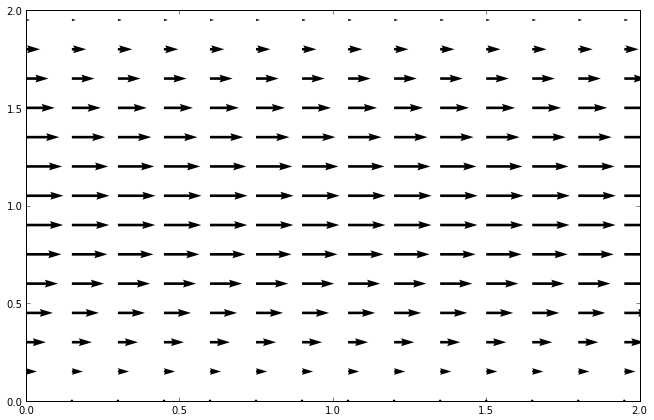

In [20]:
fig = plt.figure(figsize = (11,7), dpi=100)
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3])

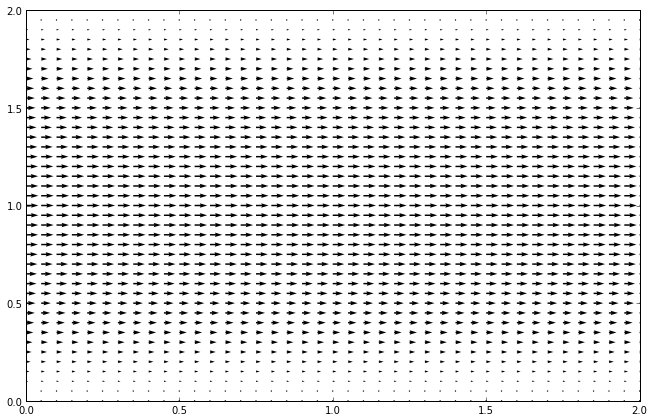

In [21]:
fig = plt.figure(figsize = (11,7), dpi=100)
plt.quiver(X, Y, u, v)

##### ¿Cuál es el significado del término $F$?

El Paso 12 es un ejercicio que demuestra el problema de flujo en un canal o tubo. Si recuerdas la clase de mecánica de fluidos, un gradiente de presión especificado es lo que impulsa el flujo de Poisseulle.

Recordemos la ecuación de momento-$x$

$$\frac{\partial u}{\partial t}+u \cdot \nabla u = -\frac{\partial p}{\partial x}+\nu \nabla^2 u$$

Lo que se hace realmente en el paso 12 es dividir la presión en componentes estacionarias y no estacionarias $p=P+p'$. El gradiente de presión constante aplicado es la constante $-\frac{\partial P}{\partial x}=F$ (interpretado como un término fuente), y el componente de inestabilidad es $\frac{\partial p'}{\partial x}$. Así que la presión que se resuelve en el Paso 12 es en realidad $p'$, lo que para un flujo constante es, de hecho, igual a cero en todas partes.

**¿Por qué hicimos esto?**

Ten en cuenta que usamos condiciones de contorno periódicas para este flujo. Para un flujo con un gradiente de presión constante, el valor de la presión en el borde izquierdo del dominio debe ser diferente de la presión en el borde derecho. Así que no podemos aplicar las condiciones de contorno periódicas a la presión directamente. Es más fácil fijar el gradiente y luego resolver para las perturbaciones en la presión.

**¿No debemos esperar siempre una $p'$ uniforme/constante entonces?**

Eso es cierto sólo en el caso de flujos laminares estables. A altos números de Reynolds, los flujos en los canales pueden llegar a ser turbulentos, y vamos a ver las fluctuaciones inestables en la presión, lo que resultará en valores distintos de cero para $p'$. 

En el paso 12, ten en cuenta que el campo de presión en sí no es constante, sino que es el campo de perturbación de presión que hay. El campo de presión varía linealmente a lo largo del canal con pendiente igual al gradiente de presión. También, para flujos incompresibles, el valor absoluto de la presión es intrascendente.